#### Description: Functions to analyse timeseries on their spetrum.
#### Author:      Tim Sieker
#### E-mail:      timsieker@gmail.com

In [1]:
from spectrum import *

In [2]:
### import 1d time series of NAO index
nlag = 100
idx = int(nlag / 2)
NAO = np.loadtxt('norm.nao.monthly.b5001.current.ascii.txt')
NAO_year = NAO[:,0]
NAO_month = NAO[:,1]
NAO_time = (NAO_year - 1950)*12 + NAO_month ## in months since 1950
NAO_data = NAO[:,2]
N = len(NAO_data)

Check data on missing values, uneven time steps or unrealistic values

In [3]:
check_data(NAO_data, t=NAO_time)

Everything is looking good


No issues where detected in this data, so we can go ahead and calculate the spectrum and the fitted AR processes.

In [4]:
freq, NAO_spect = spectrum(NAO_data, ft_method='fft')

_, NAO_spect_rn = red_noise(NAO_data)
_,NAO_spect_wn = white_noise(NAO_data)

NAO_spect_rn_99n, NAO_spect_rn_99p = noise_ci(NAO_spect_rn, q=0.05)

And make a simple plot:

Text(0, 0.5, 'Spectral Variance')

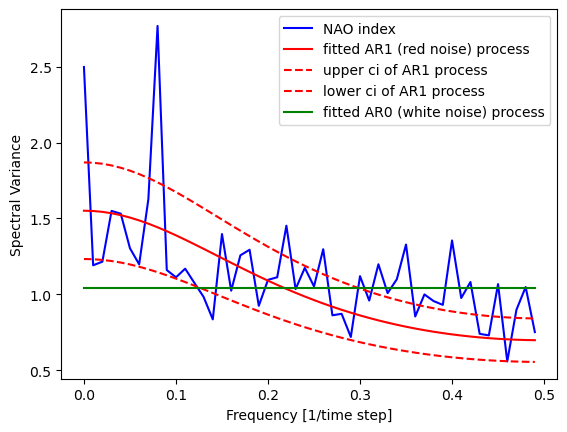

In [5]:
plt.plot(freq[:idx], NAO_spect[:idx], 'blue', label='NAO index')
plt.plot(freq[:idx], NAO_spect_rn[:idx], 'r', label='fitted AR1 (red noise) process')
plt.plot(freq[:idx], NAO_spect_rn_99p[:idx], 'r--', label='upper ci of AR1 process')
plt.plot(freq[:idx], NAO_spect_rn_99n[:idx],'r--', label='lower ci of AR1 process')
plt.plot(freq[:idx], NAO_spect_wn[:idx],'green', label='fitted AR0 (white noise) process')
plt.legend()

plt.xlabel('Frequency [1/time step]')
plt.ylabel('Spectral Variance')
